# VERIFICA LEGGE DI MALUS:

$I(\alpha) = I_0\cos^2(\alpha)$

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import jax.numpy as jnp
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'malus.csv'
fr = pd.read_csv(FILE)

E' stato variato l'angolo di inclinazione del ricevitore (-180°,180°)s

- $\sigma_V$ = misurata sperimentalmente (fluttuazione della grandezza)
- $\sigma_\alpha$ = 1°

In [5]:
# import dati da csv

α = np.array(fr['alpha (deg)']) * np.pi / 180 # rad
V = np.array(fr['V (Volt)']) # Volt
# I = np.array(fr['I (mA)'])[0:11] # Ampere
# sigmaI = np.array(fr['sigmaI'])[0:11] # Ampere
sigmaV = np.array(fr['sigmaV'])# Volt
sigmaα = np.ones_like(α)*np.pi/180 # rad

Abbiamo due modelli possibili:
- Il nostro sensore misura l'intensità del fascio $I$
- Il nostro sensore misura l'ampiezza del campo elettrico $E$

Sappiamo che il fascio si tratta di microonde polarizzate linearmente

cerchiamo inoltre l'angolo in cui la polarizzazione è massima variando l'angolo del ricevitore

In [3]:
def legge_malus(α,I0,θ_0): # I \propto cos^2(α - θ_0)
    return I0 * np.cos(α - θ_0)**2

def campo_polarizzato(α,E0,θ_0): # E \propto |cos(α - θ_0)|
    return E0 * jnp.abs(jnp.cos(α - θ_0))

malus_E = Interpolazione(α, V,sigmaV,sigmaα,campo_polarizzato,[1,0],['E0','θ'])
print(malus_E)

# malus_I = Interpolazione(α, I, campo_polarizzato, sigmaI,[0,0],names=['I0','offset'])

----------------- VALORI FIT: -----------------
E0: 1.634 ± 0.005 
θ: (6.058 ± 4.732)e-3 

dof: 23
chi2: 54.9
chi2 ridotto: 2.39
pvalue: 0.0
------------------------------------------------



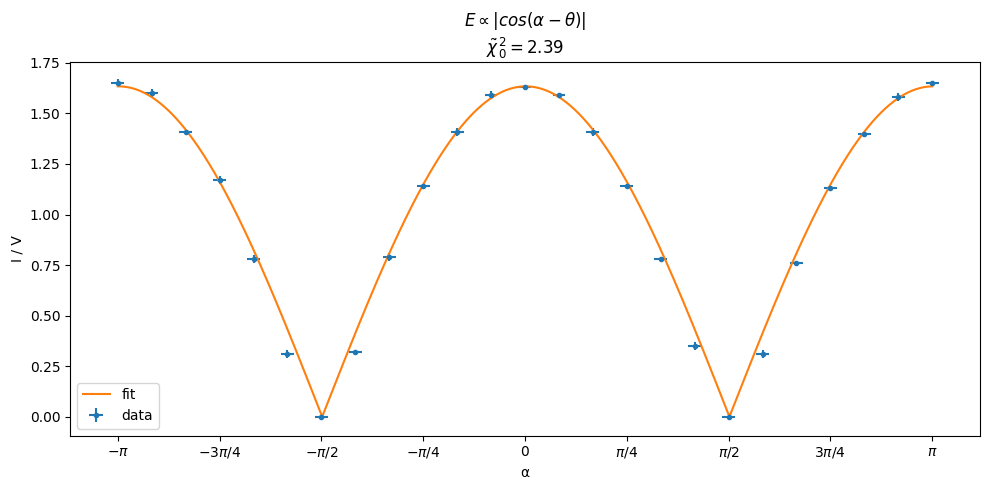

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot for V

ax.errorbar(α, V, yerr=sigmaV,xerr=np.pi/180*np.sqrt(2)*2, fmt='.', label='data')

x = np.linspace(-np.pi,np.pi, 10000)
y = campo_polarizzato(x, *malus_E.values.values())
ax.plot(x,y, label='fit')


ax.set_xticks([-np.pi,-3*np.pi/4,-np.pi/2,-np.pi/4,0,np.pi/4, np.pi/2, 3*np.pi/4, np.pi])
ax.set_xticklabels(['$-\pi$','$-3\pi/4$','$-\pi/2$','$-\pi/4$','$0$','$\pi/4$','$\pi/2$','$3\pi/4$','$\pi$'])
ax.set_xlabel('α')
ax.set_ylabel('I / V')
ax.set_title('$E \propto |cos(α - θ)|$\n' + f'$\\tilde\chi_0^2 = {malus_E.rchi2}$')
ax.legend()

plt.tight_layout()
plt.show()

le andature di tensione e di corrente seguono la legge $|\cos(x)|$, i nostri rilevatori leggono quindi l'ampiezza del campo elettrico